#  Coherent J/$\psi$ production in ultraperipheral PbPb collisions at $\sqrt{s_{_{\text{NN}}}}=5.02$ TeV

## Classify event via neutron multiplicity

This notebook is part of the Heavy Ion Exercise for the CERN CMSDAS School 2024.

Because of high photon flux, the photon induced interactions ($\gamma\gamma$ and $\gamma$A) have a high probability to be accompanied by additional photon exchanges that excite one or both of the ions into giant dipole resonances (GDRs) or higher excitations in UPCs. The GDRs typically decay by emitting a single neutron, while higher resonances usually decay by emitting two or more neutrons [[RMP 47 (1975) 713](http://dx.doi.org/10.1103/RevModPhys.47.713)]. These neutrons have low transverse momentum with respect to their parent ion, so largely retain the beam rapidity and are easily detected by ZDC (plus and minus) located in forward rapidity of CMS detector.

To study the neutron multiplicity dependence, the events can be classified into 3 neutron multiplicity classes, which are labeled ”0n0n”, ”0nXn”, and ”XnXn” (X ≥ 1), where,
* 0n0n: No neutron emission from either nucleus.
* Xn0n: While on neutron emitted from one nucleus, there are ≥1 neutrons are emitted from the other one.
* XnXn: Emitted neutrons should be ≥ 1 from each nucleus.

More interestingly, the contribution of higher excitations becomes larger as impact parameter becomes smaller [[PR 458 (2008) 878](http://dx.doi.org/10.1016/j.physrep.2007.12.001)]. Therefore, the forward neutron multiplicity can be used to classify UPC events into different impact parameter ranges, while high neutron multiplicity corresponds to small mean impact parameter and low neutron multiplicity corresponds to large mean impact parameter ($\langle\text{b}_\text{XnXn}\rangle < \langle\text{b}_\text{Xn0n}\rangle < \langle\text{b}_\text{0n0n}\rangle$), as shown in Figure 1.

![Neutron multiplicity](https://www.annualreviews.org/na101/home/literatum/publisher/ar/journals/content/nucl/2020/nucl.2020.70.issue-1/annurev-nucl-030320-033923/20201016/images/large/nucl700323.f2.jpeg)

_Figure 1_ - (a) Impact parameter dependence of the probabilities, from STARLight, of the three primary forward neutron topologies: 0n0n, or no neutron emission in either direction, which selects impact parameters $\text{b} > 40$ fm; Xn0n, with neutron emission in only one direction, which selects impact parameters of $\text{b} \approx 20$ fm; and XnXn, with neutron emission in both directions, which selects impact parameters $\text{b} < 15$ fm. (b) STARLight calculation of the impact parameter dependence of coherent $\rho$ production, assuming different ZDC fragmentation scenarios. The difference between mutual Coulomb excitation and no breakup is quite stark at larger impact parameters. Figure sourced from [ARNPS 70 (2020) 323](https://www.annualreviews.org/doi/10.1146/annurev-nucl-030320-033923).

## Determine neutron multiplicity based on the ZDC distributions

After the collision takes place, charge particles are deflected at the beam crossing point and only neutral particles (e.g. neutrons and photons) at $\left|\eta\right|>8.3$ reach the ZDC located at 140 m, as shown in Figure 2.

![ZDC](img/zdc.png)
_Figure 2_ - Plan view of the section between the interaction point (IP) and the ZDC. Due to the beam optics, charged particles are deflected while the neutral particles travel directly to the ZDCs (one at each side of the IP). Figure from [ATL-FWD-PROC-2013-001](https://cds.cern.ch/record/1628749/files/ATL-FWD-PROC-2013-001.pdf).

The ZDC has been designed with an electromagnetic and hadronic section that separates photons and neutrons, and detect high energy neutrons with ~100% efficiency. Therefore, forward neutron multiplicities can be derived by analyzing the energy distributions (recorded as Analog-Digital Converter (ADC) units) of these neutrons deposited in ZDC.

![ZDC](https://inspirehep.net/files/0983b0d673d1c5be43a92c3dff7c049e)

_Figure 3_ - Schematic side-view of the CMS ZDC. The calorimeter is placed at an angle $\theta<0.5$ mrad, corresponding to $\left|\eta\right|>8.3$ inside a special detector slot in the neutral particle absorber (TAN), which is used to protect the first LHC superconducting quadrupole magnet from radiation. The sampling sections interleave W and quartz fibers with 5 horizontal electromagnetic divisions and 4 longitudinal hadronic divisions. The electromagnetic (hadronic) section totals 19 $X_0$ (5.6$\lambda$). Figure sourced from [JINST 16 (2021) 05, P05008](https://arxiv.org/pdf/2102.06640.pdf).


In the following cell we will open the skim data and display the minus vs. plus ZDC ADC distributions from events containing at least one $\mu^{-}\mu^{+}$ pair.

In [1]:
%load_ext autoreload
%autoreload 2

import ROOT
import pandas as pd
import numpy as np
import sys
sys.path.append('snippets')
import helpers
from fit_plot import *
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)

Welcome to JupyROOT 6.30/04


In [2]:
#extract the ZDC ADC from data
ROOT.ROOT.EnableImplicitMT()

#pre-selected data (filled bunches)
df = ROOT.RDataFrame('ZDC','skim/data_zdc.root')
df = pd.DataFrame(df.AsNumpy(['zdcPlus', 'zdcMinus']))

# empty bunch data
emptydf = ROOT.RDataFrame('ZDC','skim_emptybx/data_emptybx.root')
emptydf = pd.DataFrame(emptydf.AsNumpy(['zdcPlus', 'zdcMinus']))

ROOT.ROOT.DisableImplicitMT()

Warning in <RTaskArenaWrapper>: CPU Bandwith Control Active. Proceeding with 2 threads accordingly


Make some control distributions of the energy deposits in the ZDCs

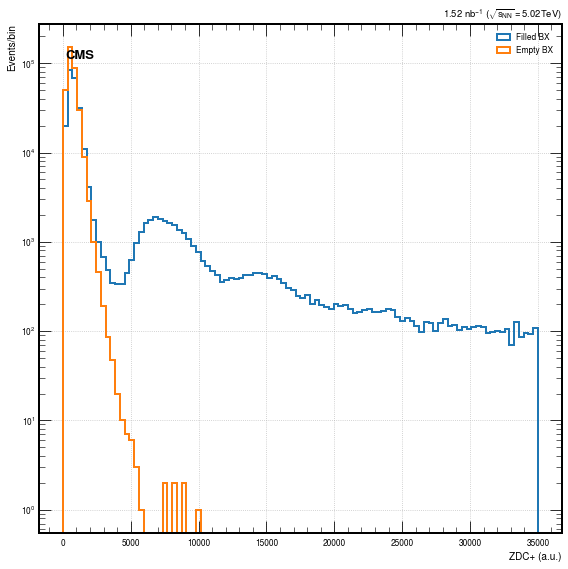

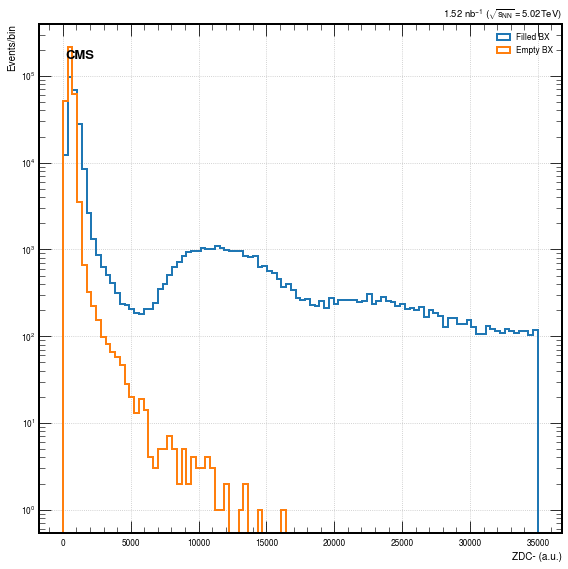

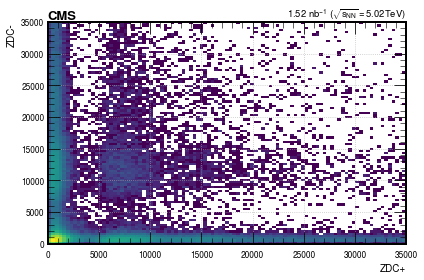

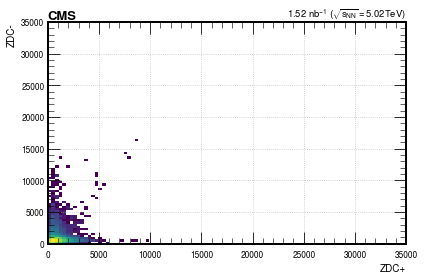

In [3]:
#inpect the 1D distributions of energy deposits in the ZDC
dflist=[(df,None,'Filled BX'),(emptydf,None,'Empty BX')]

helpers.inspectDistribution(dflist,var='zdcPlus',xlabel=r'ZDC+ (a.u.)',
                            bins=np.linspace(0, 35000, 100+1),xscale='linear',yscale='log')
helpers.inspectDistribution(dflist,var='zdcMinus',xlabel=r'ZDC- (a.u.)',
                            bins=np.linspace(0, 35000, 100+1),xscale='linear',yscale='log')

#2D correlations
helpers.showCorrelation(df,x='zdcPlus',y='zdcMinus',
                        xbins=np.linspace(0, 35000, 100),
                        ybins=np.linspace(0, 35000, 100),
                        xlabel='ZDC+',ylabel='ZDC-')

helpers.showCorrelation(emptydf,x='zdcPlus',y='zdcMinus',
                        xbins=np.linspace(0, 35000, 100),
                        ybins=np.linspace(0, 35000, 100),
                        xlabel='ZDC+',ylabel='ZDC-')

# prevent (scrollable) sub-window; change 140em if you need to extend further
# https://stackoverflow.com/questions/18770504/resize-ipython-notebook-output-window
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 140em; }</style>"))


##  Neutron class purity

One needs to ensure that the contamination in each neutro category is minimized. In the case of 0 neutrons, there is no activity in the ZDC, however there is always the intrinsic noise present in the detector. The ZDC noise distributions are studied by empty bunch crossing events triggered by HLT_HIL1NotBptxOR and stored in the /HIEmptyBX/HIRun2018A-27Feb2019-v1/AOD dataset.

The ZDC ADC thresholds for 0n and Xn (X > 1) are defined such that the noise contamination is kept <0.02% for either , and shown in the table below:


|Neutron multiplicity| ZDC ADC range      |
|------------------- | -------------------|
| 0n (Plus)          | ADC < 4200         |
| Xn (X≥1, Plus)     | 4200 < ADC < 50000 |
| 0n (Minus)         | ADC < 6000         |
| Xn (X≥1, Minus)    | 6000 < ADC < 60000 |

In [4]:
print('Requirements for empty ZDC <0.02% noise (compare to final values in the table above)')
print(f"0n+ => ADC<{emptydf['zdcPlus'].quantile(0.9998)}")
print(f"0n- => ADC<{emptydf['zdcMinus'].quantile(0.9998)}")

Requirements for empty ZDC <0.02% noise (compare to final values in the table above)
0n+ => ADC<3744.5843833987283
0n- => ADC<6194.578118945874


Next we will proced to determine the efficiency of the ZDC ADC cut on the Xn (X > 1) multiplicity class. To accomplish this we will fit the plus and minus ZDC ADC distributions using multi-Gaussian functions.

Let's start by defining 3 Gaussian PDFs to fit the 1n, 2n and 3n neutron multiplicity peaks.

## 5.2 Neutron class purity

One needs to ensure that the contamination in each neutro category is minimized. In the case of 0 neutrons, there is no activity in the ZDC, however there is always the intrinsic noise present in the detector. The ZDC noise distributions are studied by empty bunch crossing events triggered by HLT_HIL1NotBptxOR and stored in the /HIEmptyBX/HIRun2018A-27Feb2019-v1/AOD dataset.

The ZDC ADC thresholds for 0n and Xn (X > 1) are defined such that the noise contamination is kept <0.02% for either , and shown in the table below:


|Neutron multiplicity| ZDC ADC range      |
|------------------- | -------------------|
| 0n (Plus)          | ADC < 4200         |
| Xn (X≥1, Plus)     | 4200 < ADC < 50000 |
| 0n (Minus)         | ADC < 6000         |
| Xn (X≥1, Minus)    | 6000 < ADC < 60000 |

Next we will proced to determine the efficiency of the ZDC ADC cut on the Xn (X > 1) multiplicity class. To accomplish this we will fit the plus and minus ZDC ADC distributions using multi-Gaussian functions.

Let's start by defining 3 Gaussian PDFs to fit the 1n, 2n and 3n neutron multiplicity peaks.

In [5]:
#prepare workspace for fitting ZDC energy
workspace = {}

for var in ['zdcPlus', 'zdcMinus']:
    print(f'Preparing workspace for {var}')
    #start a fitting workspace
    w = ROOT.RooWorkspace("w")

    #define the observable
    vmax = 3.5E4 if var=="zdcPlus" else 5E4
    w.factory(f'{var}[0, {vmax}]')
    w.var(var).setBins(200)
    w.var(var).setRange('full', 0, vmax)

    #create model
    w.factory("RooFormulaVar::sigma3('@0*@1', {sf3[1.3, 0.9, 1.4], sigma2[3.2E3, 1, 7E3]})")
    w.factory(f"RooGaussian::model_G1({var}, mu1[8E3, 0, 20E3], sigma1[1.6E3, 1, 5E3])")
    w.factory(f"RooGaussian::model_G2({var}, mu2[14E3, 8E3, 30E3], sigma2)")
    w.factory(f"RooGaussian::model_G3({var}, mu3[23E3, 14E3, 50E3], sigma3)")
    w.factory("SUM::model(N_G1[1E4, 0, 1E6] * model_G1, N_G2[1E4, 0, 1E6] * model_G2, N_G3[1E4, 0, 1E6] * model_G3)")
    w.saveSnapshot('initial_setting', w.allVars())

    #now import the data
    data = ROOT.RooDataSet.from_numpy({var: df[var]}, [w.var(var)])
    data.SetName('data')
    w.Import(data)
    
    workspace[var] = w

Preparing workspace for zdcPlus
Preparing workspace for zdcMinus
[#1] INFO:Eval -- RooRealVar::setRange(zdcPlus) new range named 'full' created with bounds [0,35000]
[#0] WARNING:DataHandling -- RooDataSet.from_numpy() Ignored 29324 out-of-range events
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data
[#1] INFO:Eval -- RooRealVar::setRange(zdcMinus) new range named 'full' created with bounds [0,50000]
[#0] WARNING:DataHandling -- RooDataSet.from_numpy() Ignored 30559 out-of-range events
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data


Then we proceed to fit the plus and minus ZDC ADC distributions.

In [6]:
import ROOT.RooFit as RF

#perform fit
for var, w in workspace.items():
    print(f'Fitting {var}')
    w.loadSnapshot('initial_setting')
    if var=="zdcPlus":
        w.var(var).setRange('fit', 4E3, 30E3)
    else:
        w.var(var).setRange('fit', 5E3, 40E3)
    w.pdf('model').fitTo(w.data('data'), RF.NumCPU(2), RF.PrintLevel(-1), RF.Save(1), RF.Range('fit')).Print()

Fitting zdcPlus
Fitting zdcMinus
[#1] INFO:Eval -- RooRealVar::setRange(zdcPlus) new range named 'fit' created with bounds [4000,30000]
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Eval -- RooRealVar::setRange(zdcPlus) new range named 'fit_nll_model_data' created with bounds [4000,30000]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 2 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (model_G1,model_G2,model_G3)
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (model_G1,model_G2,model_G3)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimizat

Next we proceed to display fit results

zdcPlus
zdcMinus


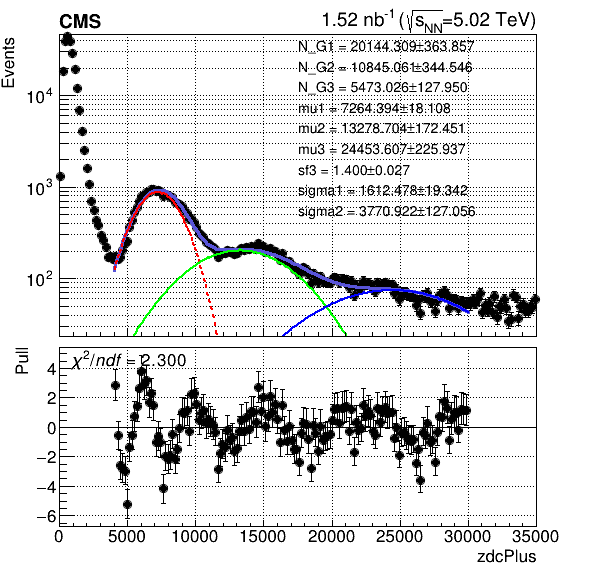

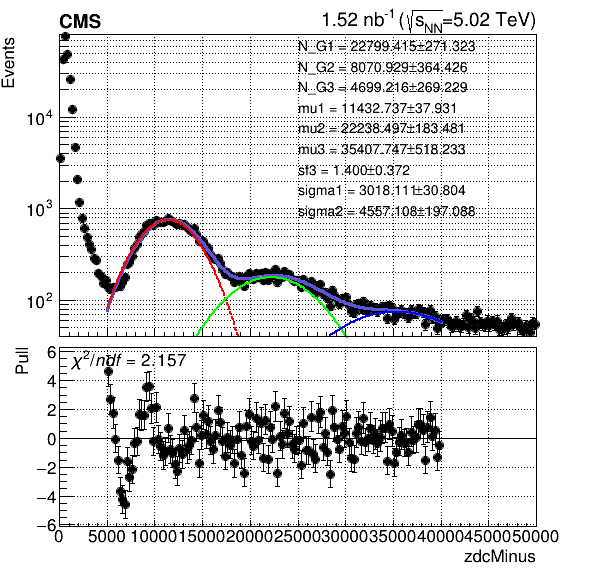

In [7]:
canvas=[]
for var,w in workspace.items():
    print(var)
    canvas.append(
        plotFitResults(w,
                       model=w.pdf('model'),
                       data=w.data('data'),
                       varname=var,
                       vartitle=var,
                       components=[f'model_G{i+1}' for i in range(3)],
                       component_colors=[2,3,4,6,12],
                       ran='fit')
    )
    canvas[-1].cd(1).SetLogy()

Now that we have determined the ZDC ADC thresholds and the corresponding neutron multiplicity peak distributions, we can:

* For those feeling **bold** : 
  * Include the noise template derived from the empty bunches in the fit and estimate the purity and efficiency using all the ingredients
  * Using the result of the fit and the table of cuts on the ZDC energy derive the confusion matrix 
* In groups: go back to the starting point and redo the J/$\psi$ signal extraction after applying the neutron multiplicity classes: 0n0n, Xn0n and XnXn.